In [1]:
import scipy as sp
import numpy as np
from mayavi import mlab
from itertools import chain
import matplotlib.pyplot as plt

from ggqpy import construct_Chevyshev_quadratures
from ggqpy.functionfamiliy import Interval
from ggqpy.testproblems import example_problem, gen_poly_and_sing
from ggqpy.discretize import Discretizer
from ggqpy.compress import compress_sequence_of_functions, visualise_diagonal_dropoff, construct_A_matrix
from ggqpy.optimize import QuadOptimizer

********************************************************************************
         to build the TVTK classes (9.1). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



In [2]:
max_degree = 3
Y = lambda m,l: lambda theta, phi: sp.special.sph_harm(m,l,phi,theta)
# functions = [[lambda theta, phi: Y(m,l)(theta,phi) for m in range(-l, l+1)] for l in range(1,max_degree)]
functions = [[lambda theta, phi, m=m, l=l: Y(m,l)(theta,phi) for m in range(-l, l+1)] for l in range(1,max_degree)]
functions = list(chain(*functions))
print(len(functions))
for f in functions:
    print(f(1,2))

8
(-0.12098358252148973-0.2643539506096446j)
(0.26399306383411286+0j)
(0.12098358252148973-0.2643539506096446j)
(-0.17877839004595122+0.20699342481939617j)
(-0.14616663998211432-0.3193799350399147j)
(-0.03917802060397163+0j)
(0.14616663998211432-0.31937993503991474j)
(-0.17877839004595122-0.20699342481939617j)


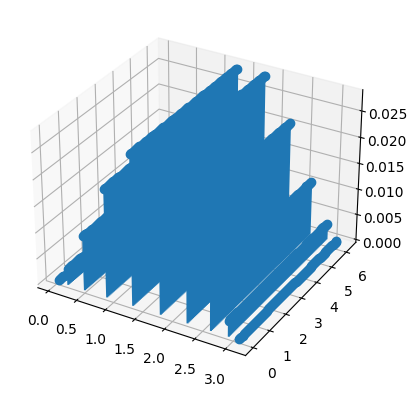

In [3]:

disc = Discretizer()
theta_d,phi_d,w_d,theta_l,phi_l = disc.naive_discretize2d_sphere(10, 100)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
markerline, stemlines, baseline = ax.stem(theta_d,phi_d,w_d, basefmt=" ")
plt.show()

In [4]:
print(w_d.sum() - 4*np.pi)
print(Y(0,0)(theta_d,phi_d)@w_d - np.sqrt(4*np.pi))

for l in range(1,3):
    for m in range(-l, l+1):
        print((m,l), abs(Y(m,l)(theta_d,phi_d)@w_d))

1.7763568394002505e-15
(4.440892098500626e-15+0j)
(-1, 1) 8.229979859481216e-17
(0, 1) 1.78649412971299e-16
(1, 1) 8.229979859481216e-17
(-2, 2) 3.8161311878445225e-16
(-1, 2) 6.91945652473941e-18
(0, 2) 6.355762062068599e-11
(1, 2) 7.392346536967684e-18
(2, 2) 3.9075546242326833e-16


In [5]:
A = construct_A_matrix((theta_d,phi_d),w_d,functions)
u = A[:,2]
v = A[:,2]

(1000, 8)


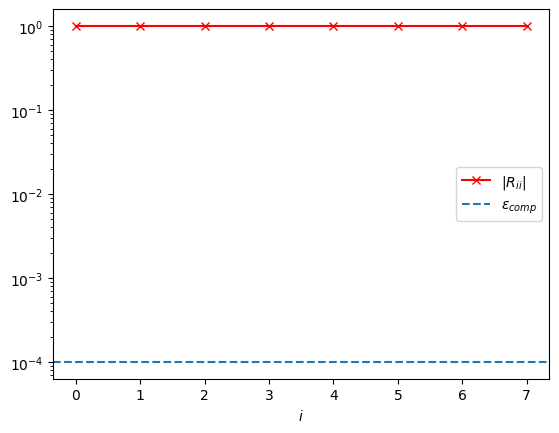

In [6]:
precision = 1e-4
U, rank = compress_sequence_of_functions(functions,(theta_d,phi_d),w_d,precision)
print(U.shape)
A = construct_A_matrix((theta_d,phi_d),w_d,functions)
visualise_diagonal_dropoff(A,precision)

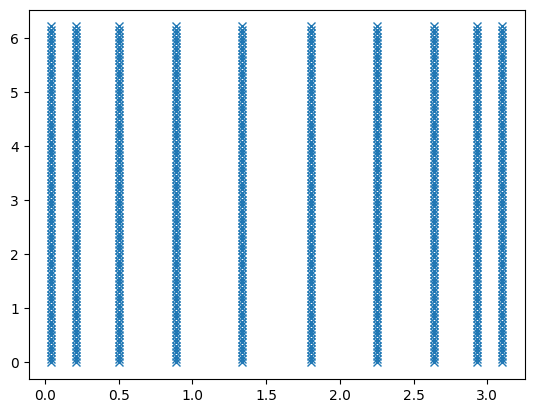

In [7]:
plt.plot(theta_d, phi_d,"x")

In [16]:
(theta_c,phi_c),w_c = construct_Chevyshev_quadratures((theta_d,phi_d),w_d,U)

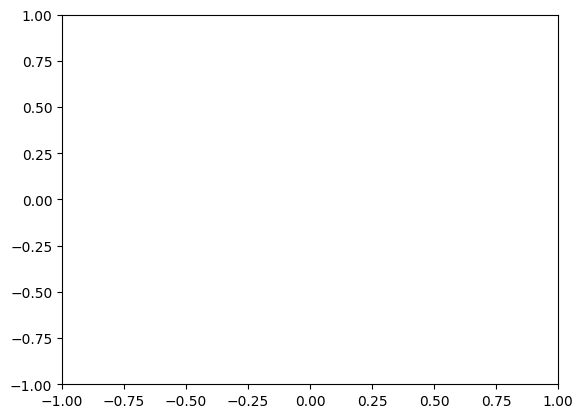

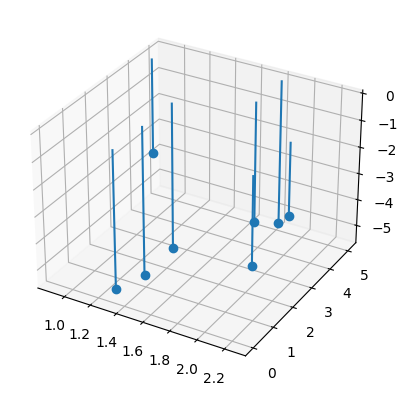

(-2.1028286998384856e-13-5.3627370661596004e-17j)


In [17]:
plt.plot(theta_c,phi_c,"rx")
plt.xlim(-1,1);
plt.ylim(-1,1);
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
markerline, stemlines, baseline = ax.stem(theta_c, phi_c, w_c.real, basefmt=" ")
plt.show()
print(np.cos(phi_c)@w_c)

In [10]:
print(w_c.sum())
print(Y(0,0)(theta_c,phi_c)@w_c - np.sqrt(4*np.pi))

for l in range(1,3):
    for m in range(-l, l+1):
        print((m,l), abs(Y(m,l)(theta_c,phi_c)@w_c))

(-3.570209559768419e-10-6.632111880126375e-17j)
(-3.5449077019117454-1.8708842198453132e-17j)
(-1, 1) 1.014619324918222e-16
(0, 1) 4.805736883343612e-16
(1, 1) 1.1636421147916248e-16
(-2, 2) 4.220063285617599e-16
(-1, 2) 4.009424992425091e-17
(0, 2) 6.356111047121653e-11
(1, 2) 4.549567813357321e-17
(2, 2) 3.9342474331144735e-16
